In [1]:
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [2]:
covid_file = "./cov.csv"
influenza_file = "./influenza.csv"
flu_df = pd.read_csv(influenza_file)
cov_df = pd.read_csv(covid_file)


## Covid


In [29]:
cov_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
202156,2022-04-30,ZW,Zimbabwe,AFRO,58,247842,0,5469
202157,2022-05-01,ZW,Zimbabwe,AFRO,0,247842,0,5469
202158,2022-05-02,ZW,Zimbabwe,AFRO,0,247842,0,5469
202159,2022-05-03,ZW,Zimbabwe,AFRO,0,247842,0,5469


In [61]:
# prepare data for analisis
def get_singe_country(country_name):
    country_cov = cov_df[cov_df["Country"] == country_name]
    columns = ["Date_reported","New_cases", "Cumulative_cases", "New_deaths", "Cumulative_deaths"]
    country_cov = country_cov[columns].reset_index().drop("index", axis=1)
    country_cov["Date_reported"] = pd.to_datetime(country_cov["Date_reported"])
    start_date = datetime.datetime(2020,1,1)
    stop_date = datetime.datetime(2020,12,31)
    mask = (country_cov["Date_reported"] >= start_date) & (country_cov["Date_reported"] <= stop_date)
    country_cov = country_cov[mask]
    country_cov = country_cov.set_index(country_cov["Date_reported"]).drop("Date_reported", axis=1)
    pol_cov_month = country_cov.groupby(country_cov.index.to_period('m')).sum().drop(["Cumulative_cases", "Cumulative_deaths"], axis=1) # get month summary ammount
    return pol_cov_month



#### Get df with all countries with sumary cases and deaths

In [31]:
df_sumary_death_and_cases = pd.DataFrame(columns=["country", "cases_sumary", "deaths_sumary"])
all_countries = cov_df["Country"].unique()
all_countries_data = {country: get_singe_country(country) for country in all_countries}
for country, _df in all_countries_data.items():
    tmp_dict = pd.DataFrame({"country":country, "cases_sumary": [_df["New_cases"].sum()], "deaths_sumary":[_df["New_deaths"].sum()]})
    df_sumary_death_and_cases = pd.concat([df_sumary_death_and_cases, tmp_dict], ignore_index=True)
df_sumary_death_and_cases

,country,cases_sumary,deaths_sumary
0,Afghanistan,52330,2189
1,Albania,57727,1174
2,Algeria,99311,2751
3,American Samoa,0,0
4,Andorra,7983,84
...,...,...,...
232,Viet Nam,1456,35
233,Wallis and Futuna,4,0
234,Yemen,2101,611
235,Zambia,20462,386


In [40]:
all_countries_data.get("Poland")

,New_cases,New_deaths
Date_reported,,
2020-01,0,0
2020-02,0,0
2020-03,2055,31
2020-04,10585,593
2020-05,10931,437
2020-06,10583,383
2020-07,10877,265
2020-08,21839,324
2020-09,23092,450


In [23]:
df_sumary_death_and_cases.describe()

,country,cases_sumary,deaths_sumary
count,237,237,237
unique,237,221,178
top,Afghanistan,0,0
freq,1,14,38


In [9]:
max_cases = df_sumary_death_and_cases.query('cases_sumary == cases_sumary.max()')
display(max_cases)
print()
min_cases = df_sumary_death_and_cases.query('cases_sumary == cases_sumary.min()')
display(min_cases)


,country,cases_sumary,deaths_sumary
226,United States of America,19579818,351845


,country,cases_sumary,deaths_sumary
3,American Samoa,0,0
46,Cook Islands,0,0
54,Democratic People's Republic of Korea,0,0
110,Kiribati,0,0
135,Micronesia (Federated States of),0,0
144,Nauru,0,0
152,Niue,0,0
160,Palau,0,0
166,Pitcairn Islands,0,0
179,Saint Helena,0,0


In [10]:
max_deaths = df_sumary_death_and_cases.query('deaths_sumary == deaths_sumary.max()')
display(max_deaths)
print()
min_deaths = df_sumary_death_and_cases.query('deaths_sumary == deaths_sumary.min()')
display(min_deaths)

,country,cases_sumary,deaths_sumary
226,United States of America,19579818,351845


,country,cases_sumary,deaths_sumary
3,American Samoa,0,0
6,Anguilla,13,0
23,Bhutan,670,0
35,Cambodia,366,0
46,Cook Islands,0,0
54,Democratic People's Republic of Korea,0,0
58,Dominica,96,0
68,Falkland Islands (Malvinas),29,0
69,Faroe Islands,608,0
82,Greenland,27,0


### Mean deaths and cases of all countries 

In [13]:
df_means = pd.DataFrame([{"mean_deaths": df_sumary_death_and_cases["deaths_sumary"].mean(), "mean_cases": df_sumary_death_and_cases["cases_sumary"].mean()}]) 
df_means

,mean_deaths,mean_cases
0,8134.122363,350036.016878


### Standard deviation deaths and cases from all countries

In [21]:
df_sumary_death_and_cases.iloc[:,1:].std()

cases_sumary     1563645.331507
deaths_sumary       31536.93262
dtype: object

### Covind in seted countries

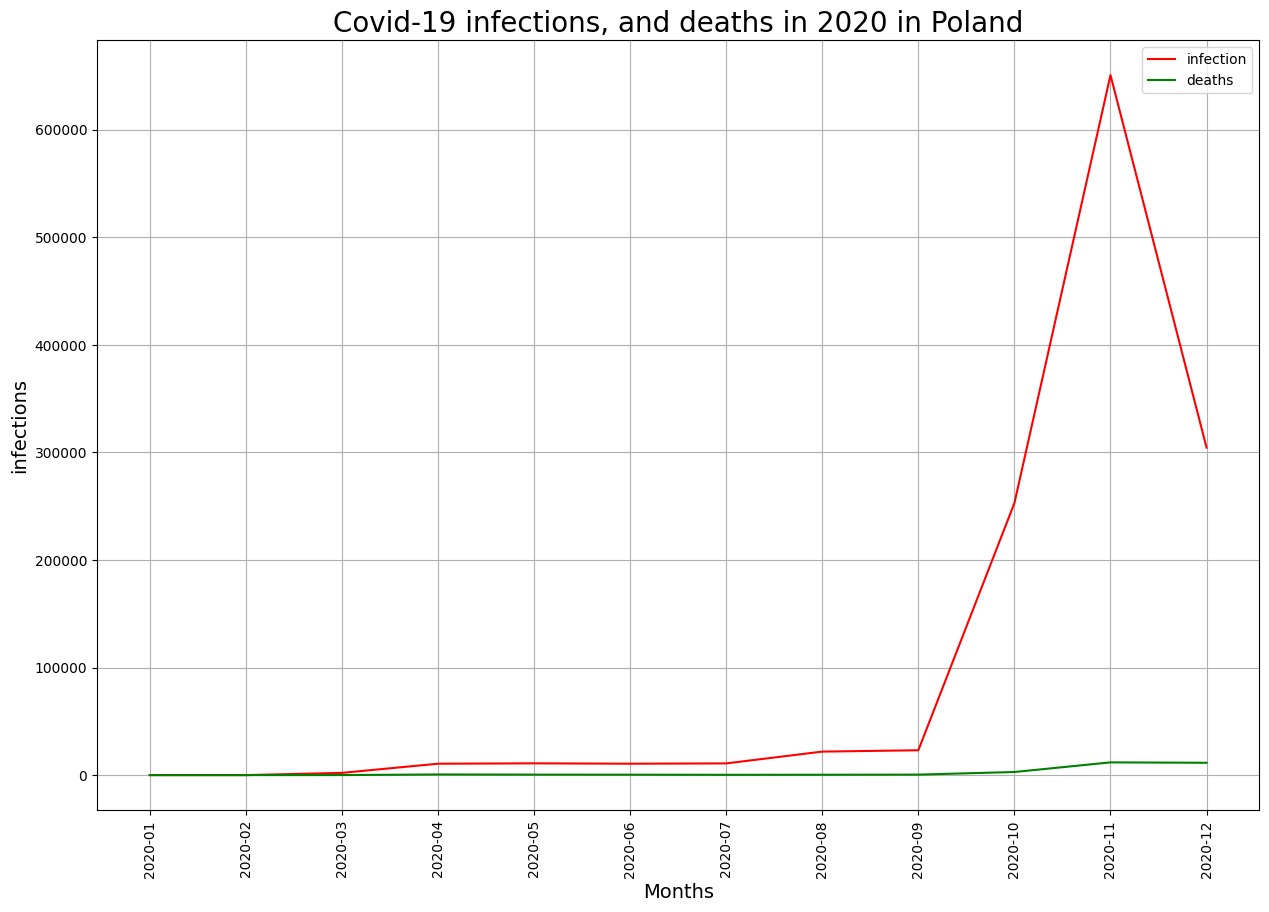

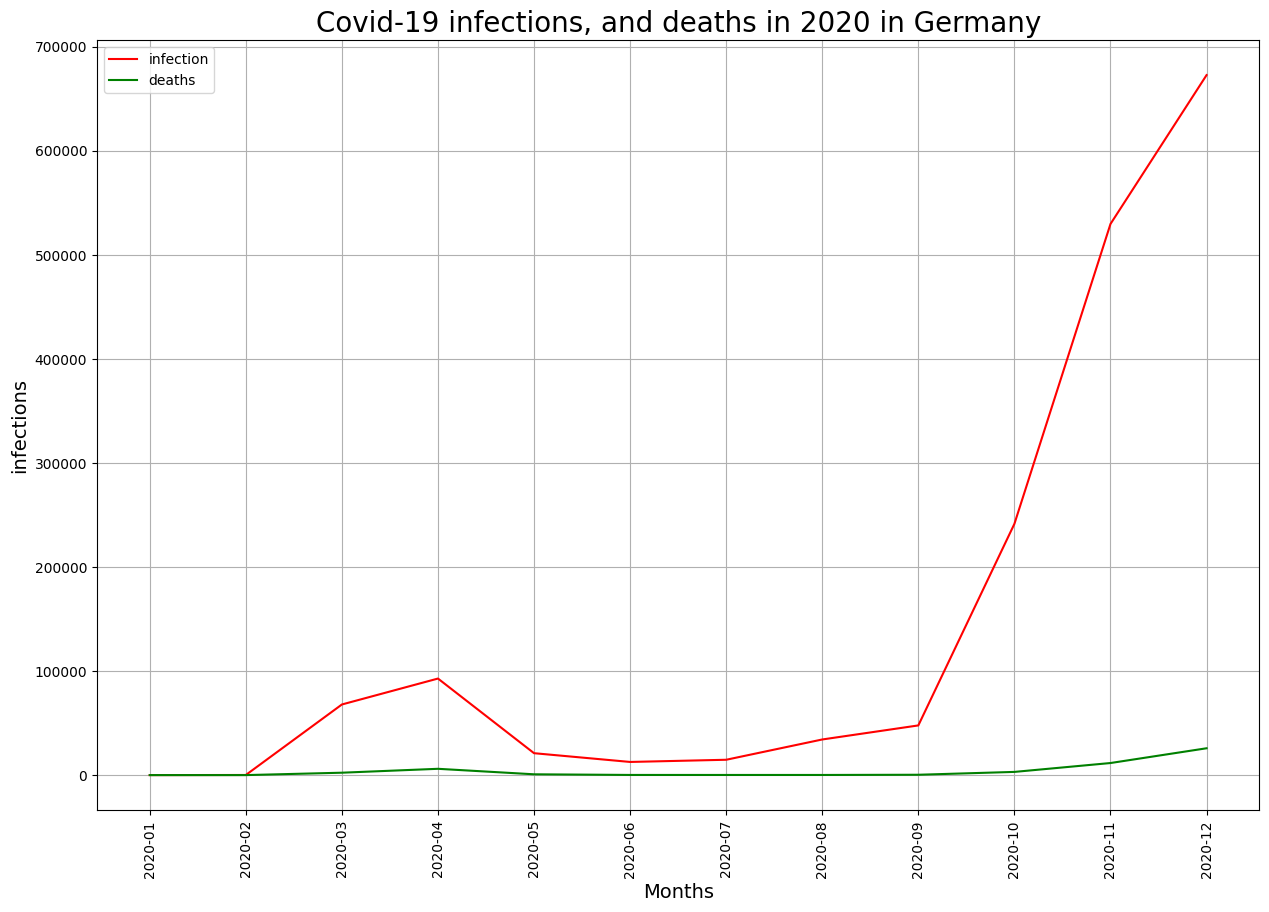

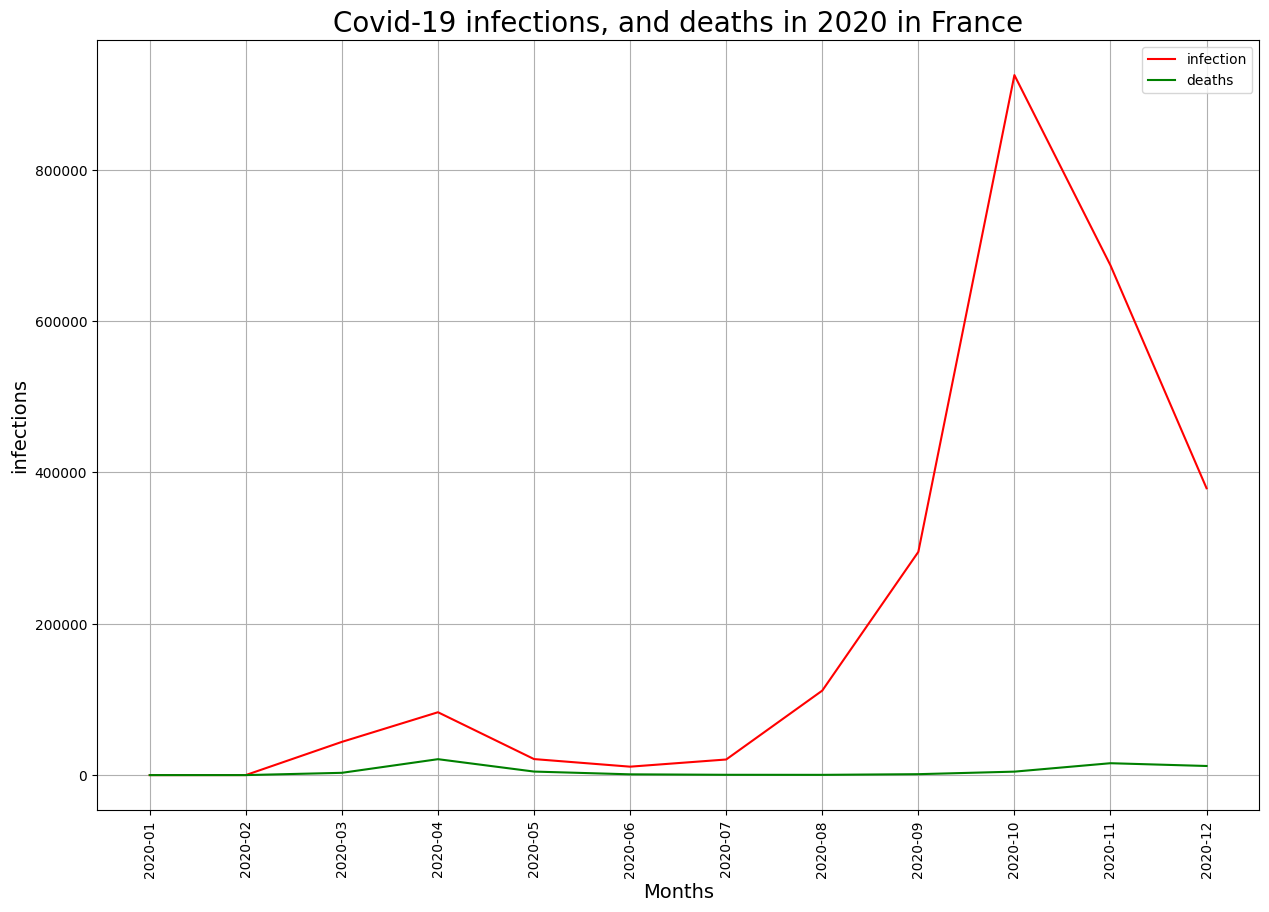

In [59]:
SETED_COUNTRIES = ["Poland", "Germany","France"]
ALL_COUNTRY = all_countries_data.keys()
def show_covid_per_country(contry_fullname):
    cov_month = all_countries_data.get(contry_fullname)
    plt.figure(figsize=(15,10))
    plt.xticks(rotation=90)
    plt.xlabel("Months", fontdict={'fontsize': 14})
    plt.ylabel("infections", fontdict={'fontsize': 14})
    plt.grid()
    plt.title(f"Covid-19 infections, and deaths in 2020 in {contry_fullname}", fontdict={'fontsize':20})
    plt.plot(cov_month.index.astype(str), cov_month["New_cases"], color='r')
    plt.plot(cov_month.index.astype(str), cov_month["New_deaths"], color='g')
    plt.legend(["infection", "deaths"])

for country in SETED_COUNTRIES:
    show_covid_per_country(country)


In [60]:
def show_covid_per_country(contry_fullname):
    cov_month = all_countries_data.get(contry_fullname)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=cov_month.index.astype(str), y=cov_month["New_cases"], name="infected", mode="lines+markers+text", text=cov_month["New_cases"], textposition="top left"))
    fig.add_trace(go.Scatter(x=cov_month.index.astype(str), y=cov_month["New_deaths"], name="deaths", mode="lines+markers+text", text=cov_month["New_deaths"], textposition="bottom center"))
    fig.update_layout(title=f"Covid-19 infections, and deaths 2020 in {contry_fullname}",
                        height=800,
                        xaxis=dict(
                            tickmode = 'array',
                            tickvals = cov_month.index.astype(str),
                            tickangle=300
                        ),
                        yaxis_title="People",
                        )
    fig.update_traces(textposition="top right")
    fig.show()
for country in SETED_COUNTRIES:
    show_covid_per_country(country)


## influenza

In [21]:
influenza_file = "./influenza.csv"
flu_df = pd.read_csv(influenza_file)

In [22]:
def remove_first_number(s):
    patt = "[0-9]*-"
    return re.sub(patt, '',s, 1)

flu_df["Unnamed: 0"] = pd.to_datetime(flu_df["Unnamed: 0"].apply(remove_first_number))
flu_df
flu_df = flu_df.set_index(flu_df["Unnamed: 0"])
flu_month = flu_df.groupby(flu_df.index.to_period('m')).sum().reset_index()
flu_month.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
flu_month["Date"] = flu_month["Date"].astype(str)
flu_month # make pickle


ValueError: time data "15-1-2020" doesn't match format "%m-%d-%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=flu_month["Date"], y=flu_month["Confirmed"], name="infected", mode="lines+markers+text", text=flu_month["Confirmed"], textposition="top left"))
fig.add_trace(go.Scatter(x=flu_month["Date"], y=flu_month["Deaths"], name="deaths", mode="lines+markers+text", text=flu_month["Deaths"], textposition="bottom left"))
fig.update_traces(textposition="top center")
fig.update_layout(title="Influenza infections, and deaths 2020 in POLAND",
                    height=800,
                    xaxis=dict(
                        tickmode = 'array',
                        tickvals = flu_month["Date"],
                        tickangle=300
                    ),
                    yaxis_title="People",
                    )


fig.show()

NameError: name 'flu_month' is not defined